In [129]:
# 超参数
# COLS_Y1= '305_price'
# COLS_Y2= 'perRefuelLiters'
# COLS_X = 'date'

COLS_ALL = ['date', '305_order_cnt', '305_amount', '305_refuelLiters', '305_price', 'high',  'encoded_holidays', 'holidays']

import pandas as pd


# 读取excel文件并获取指定列
#df_uncleaned = pd.read_csv('Data/结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL)
df_uncleaned = pd.read_csv('Data\结果1_全站按日期分组_2023全年.csv', usecols=COLS_ALL, encoding='GBK')
# 删除包含空值的行
df = df_uncleaned.dropna()
print(df)

df['305_PerLiters'] = df['305_refuelLiters'] / df['305_order_cnt']
df.drop(columns=['305_refuelLiters', 'high'], inplace=True)




           date  high holidays  encoded_holidays  305_price  305_order_cnt  \
0      2023-1-1     8       元旦                 1       7.54         546095   
1      2023-1-2     9       元旦                 1       7.54         635905   
2      2023-1-3     9       平时                 4       7.54         700728   
3      2023-1-4    12       平时                 4       7.74         499980   
4      2023-1-5    13       平时                 4       7.74         514479   
..          ...   ...      ...               ...        ...            ...   
359  2023-12-26     9       平时                 4       7.50         598525   
360  2023-12-27    12       平时                 4       7.50         584640   
361  2023-12-28    12       平时                 4       7.50         579368   
362  2023-12-29    12       平时                 4       7.50         682637   
363  2023-12-30    14       平时                 4       7.50         643768   

      305_amount  305_refuelLiters  
0    123147634.4       163

<Figure size 800x640 with 0 Axes>

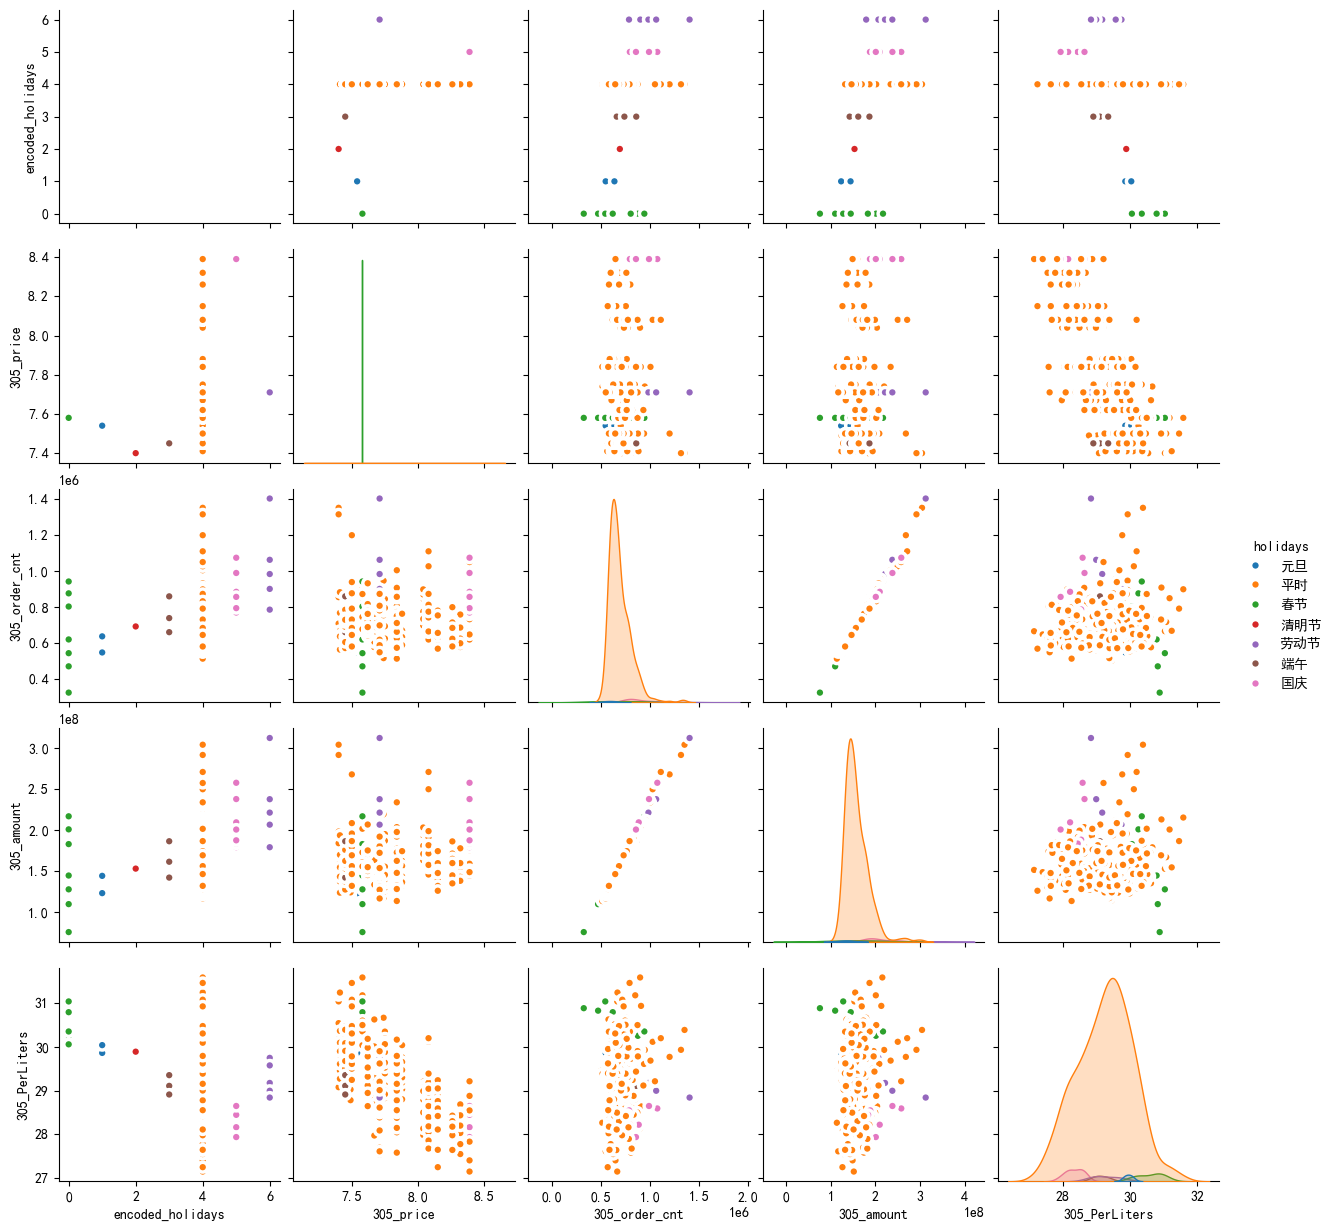

In [130]:
# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(
    df, 
    kind="scatter",     # "scatter" 散点图、 "reg"（绘制带有回归线的散点图）、"resid"（绘制残差图）、"kde"（绘制核密度估计图）等。
    hue="holidays",      # 按 名为 species 的列的类别着色。
    plot_kws=dict(
        s=50,               # 散点图点的大小
        edgecolor="white",  # 散点图边框颜色
        linewidth=2.5)      # 散点图边框宽度
    )

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体，确保能正确显示汉字
plt.show()

In [107]:
# 去掉节假日
# df_new = df[df['encoded_holidays']== 4]
# data = df_new['305_order_cnt']

# 不去节假
data = df['305_order_cnt']
#data = df['305_refuelLiters'] / df['305_order_cnt']


#data = data.head(120)
print(data)

0      546095
1      635905
2      700728
3      499980
4      514479
        ...  
359    598525
360    584640
361    579368
362    682637
363    643768
Name: 305_order_cnt, Length: 364, dtype: int64


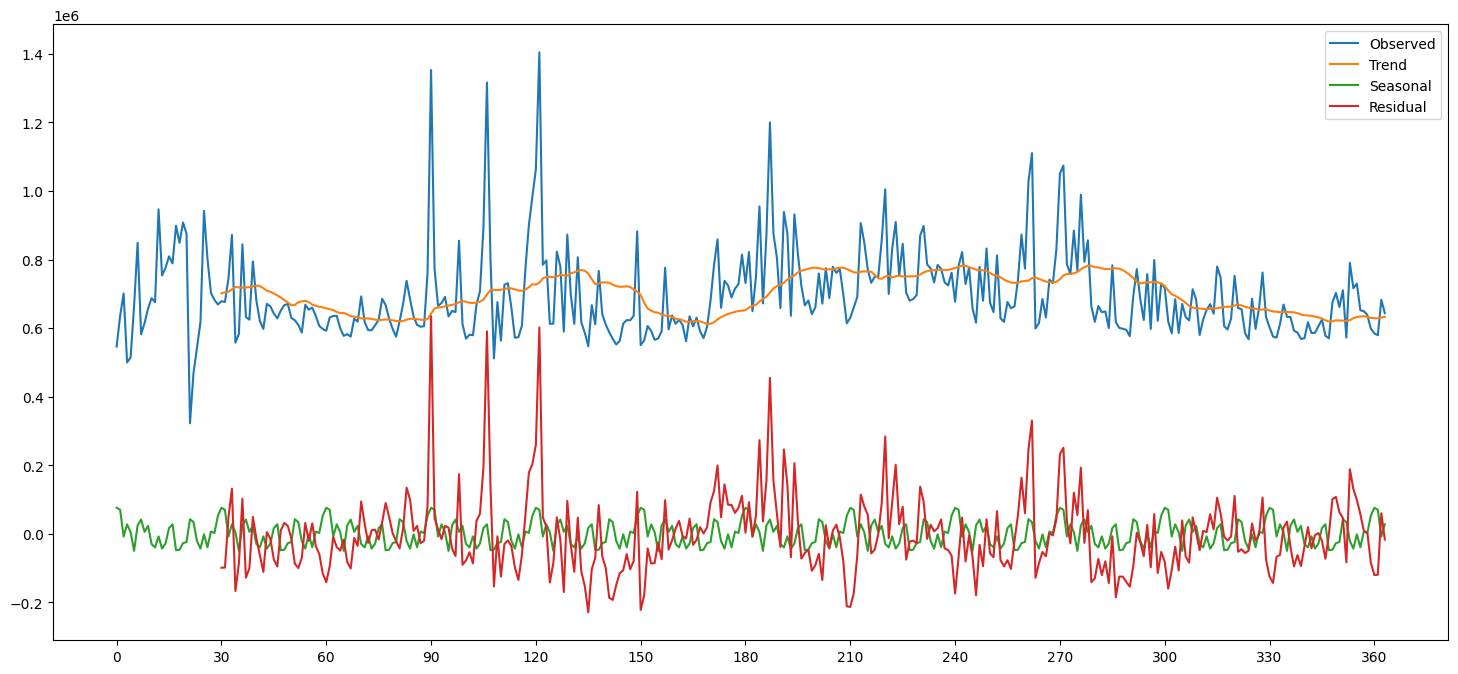

In [108]:
import statsmodels.api as sm

#进行时间序列分析
rd = sm.tsa.seasonal_decompose(
    data,               # 要分解的时间序列数据
    model="additive",   # 分解模型，可以是 'additive' （加法）或 'multiplicative'（乘法）。在加法模型中，季节性波动是固定的，而在乘法模型中，季节性波动会随着趋势的增长而增长。
    filt=None,          # 最小二乘滤波器系数
    period=30,          # 时间序列的季节周期，如果未指定，则自动检测。如果手动指定即是指多少个数据点构成一个季节周期。（例如，每天一个数据点，则每星期周期为7）
    two_sided=True,     # 是否使用双侧滤波器
    extrapolate_trend=0,# 在不充分观察到较长时间趋势的情况下，是否应该扩展趋势组件
    )

import matplotlib.ticker as ticker
# 绘制分解结果
fig, ax = plt.subplots(
    figsize = (18,8),   # 设置图片大小
    dpi = 100            # 精度
    ) #

# 绘制原始数据
ax.plot(rd.observed, label='Observed')

# 绘制趋势
ax.plot(rd.trend, label='Trend')

# 绘制季节性
ax.plot(rd.seasonal, label='Seasonal')

# 绘制残差
ax.plot(rd.resid, label='Residual')

# 设置图例
ax.legend()

# 设置X轴的刻度间隔,避免太密集
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=30))

plt.show()


[         nan          nan  23.39554451  32.18197779  38.66066808
  49.09541311  60.65479701  71.71239681  83.84535418  92.199398
  98.34332858 109.4791225  121.42092254 130.37742284 142.31621123
 154.10219574 160.16826489 167.78661452 180.22666178 191.50071039
 202.43141835 213.28377643 220.5443683  228.69276726 240.4863533
 250.47300089 260.97224922 274.21757168 282.63440727 287.84270111
 298.89891512 311.60628056 321.46676113 332.54226828 342.77592526
 349.71790057 359.06534238 370.28749466 380.51317335 392.92976405
 404.19484615 409.71907417 417.78668858 430.94021122 441.43099225
 451.11392439 463.40745402 472.10396691 478.64385128 489.14184177
 500.65355419 511.734823   523.88063626 532.13673897 538.29574899
 549.52260647 561.43324612 570.38346811 582.36252591 594.06661875
 600.09763342 607.81368786 620.25597393 631.49622989 642.47539833
 653.27983365 660.46455932 668.69269052 680.52921455 690.4678536
 701.00358709 714.24173807 722.5617776  727.81099719 738.94564325
 751.61057649 

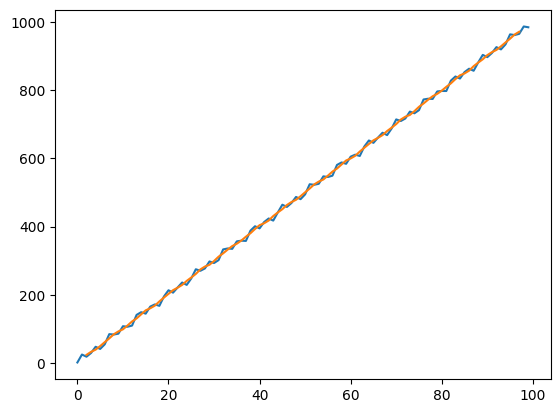

In [11]:

plt.show()
#得到趋势、周期性、随机变量的数据输出
#print(rd.trend)
#print(rd.seasonal)
#print(rd.resid)
print(rd.trend+rd.seasonal)
plt.plot(data)
plt.plot(rd.trend+rd.seasonal)
plt.show()